# State of Data 2021

### Diferenças de gênero na área de Ciência de Dados

#### Sugestões de análises:
- Diferenças gerais entre homens x mulheres de diferentes regiões do país.
    - idade
    - escolaridade / área de formação
    - experiência
    - empregados/desempregados
    - nível de cargo que ocupam
    - remuneração
    
- Diferenças na satisfação do emprego
- Forma de trabalho / ideal para entrevistado

In [21]:

import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [22]:
# Sugestão de colunas para manter no dataset e posteriormente
# limpar dados faltantes, e quem sabe até dropar outras colunas
lista_colunas = [
 "('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_a ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_e ', 'Estado onde mora')",
 "('P1_e_a ', 'uf onde mora')",
 "('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_b ', 'Regiao de origem')",
 "('P1_g_c ', 'Mudou de Estado?')",
 "('P1_h ', 'Nivel de Ensino')",
 "('P1_i ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
 "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
 "('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')",
 "('P2_l_b ', 'Salário atual não corresponde ao mercado')",
 "('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')",
 "('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')",
 "('P2_l_e ', 'Gostaria de receber mais benefícios')",
 "('P2_l_f ', 'O clima de trabalho/ambiente não é bom')",
 "('P2_l_g ', 'Falta de maturidade analítica na empresa')",
 "('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')",
 "('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')",
 "('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')",
 "('P2_o_a ', 'Remuneração/Salário')",
 "('P2_o_b ', 'Benefícios')",
 "('P2_o_c ', 'Propósito do trabalho e da empresa')",
 "('P2_o_d ', 'Flexibilidade de trabalho remoto')",
 "('P2_o_e ', 'Ambiente e clima de trabalho')",
 "('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')",
 "('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')",
 "('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')",
 "('P2_o_i ', 'Qualidade dos gestores e líderes')",
 "('P2_o_j ', 'Reputação que a empresa tem no mercado')",
 "('P2_q ', 'Atualmente qual a sua forma de trabalho?')",
 "('P2_r ', 'Qual a forma de trabalho ideal para você?')",
 "('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')",
 "('P5_b ', 'Qual oportunidade você está buscando?')",
 "('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')",
 "('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"]

In [23]:
df = pd.read_csv('State_of_Data_2021-Dataset.csv', usecols=lista_colunas)

print(df.shape)
df.head()

(2645, 49)


,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P5_b ', 'Qual oportunidade você está buscando?')","('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')","('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial.,NaN,NaN,NaN
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,NaN,NaN,NaN
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...,NaN,NaN,NaN
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...,NaN,NaN,NaN
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,0.0,1.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,NaN,NaN,NaN


In [24]:
df.columns.to_list()

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_a ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_e ', 'Estado onde mora')",
 "('P1_e_a ', 'uf onde mora')",
 "('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_b ', 'Regiao de origem')",
 "('P1_g_c ', 'Mudou de Estado?')",
 "('P1_h ', 'Nivel de Ensino')",
 "('P1_i ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
 "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
 "('P2_l_a ', 'Falta de oportunidade de cresciment

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 49 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                  --------------  -----  
 0   ('P0', 'id')                                                                                                                            2645 non-null   object 
 1   ('P1_a ', 'Idade')                                                                                                                      2617 non-null   float64
 2   ('P1_a_a ', 'Faixa idade')                                                                                                              2645 non-null   object 
 3   ('P1_b ', 'Genero')                                            

In [26]:
df.isnull().sum().sort_values(ascending=False).to_dict()

{"('P5_b ', 'Qual oportunidade você está buscando?')": 2488,
 "('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')": 2486,
 "('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')": 2484,
 "('P1_g_b ', 'Regiao de origem')": 2161,
 "('P2_e ', 'Cargo como Gestor')": 2137,
 "('P2_l_g ', 'Falta de maturidade analítica na empresa')": 2033,
 "('P2_l_f ', 'O clima de trabalho/ambiente não é bom')": 2033,
 "('P2_l_e ', 'Gostaria de receber mais benefícios')": 2033,
 "('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')": 2033,
 "('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')": 2033,
 "('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')": 2033,
 "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')": 2033,
 "('P2_l_b ', 'Salário atual não corresponde ao mercado')": 2033,
 "('P2_f ', 'Cargo Atual')": 788,
 "('P2_g ', 'Nivel')": 788,
 "('P2_o ', 'Quais os principais critérios que você leva em 

In [27]:
df_col_fitro = df[lista_colunas]
df_col_fitro

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P5_b ', 'Qual oportunidade você está buscando?')","('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')","('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial.,NaN,NaN,NaN
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,NaN,NaN,NaN
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...,NaN,NaN,NaN
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...,NaN,NaN,NaN
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,0.0,1.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,...,1.0,0.0,1.0,0.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial.,NaN,NaN,NaN
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,...,0.0,0.0,0.0,0.0,Modelo 100% remoto,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,NaN,NaN,NaN
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Engenharia de Dados/Data Engineer,0 - 6 meses,Ainda não me candidatei a nenhuma vaga na área.


In [28]:
df_col_fitro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 49 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                  --------------  -----  
 0   ('P0', 'id')                                                                                                                            2645 non-null   object 
 1   ('P1_a ', 'Idade')                                                                                                                      2617 non-null   float64
 2   ('P1_a_a ', 'Faixa idade')                                                                                                              2645 non-null   object 
 3   ('P1_b ', 'Genero')                                            

In [29]:
colunas_nome = [
 'id',
 'Idade',
 'Faixa idade',
 'Genero',
 'Estado onde mora',
 'Uf onde mora',
 'Regiao onde mora',
 'Regiao de origem',
 'Mudou de Estado?',
 'Nivel de Ensino',
 'Área de Formação',
 'Qual sua situação atual de trabalho?',
 'Setor',
 'Numero de Funcionarios',
 'Gestor?',
 'Cargo como Gestor',
 'Cargo Atual',
 'Nivel',
 'Faixa salarial',
 'Quanto tempo de experiência na área de dados você tem?',
 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
 'Você está satisfeito na sua empresa atual?',
 'Qual o principal motivo da sua insatisfação com a empresa atual?',
 'Falta de oportunidade de crescimento no emprego atual',
 'Salário atual não corresponde ao mercado',
 'Não tenho uma boa relação com meu líder/gestor',
 'Gostaria de trabalhar em em outra área de atuação',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom',
 'Falta de maturidade analítica na empresa',
 'Você participou de entrevistas de emprego nos últimos 6 meses?',
 'Você pretende mudar de emprego nos próximos 6 meses?',
 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?',
 'Remuneração/Salário',
 'Benefícios',
 'Propósito do trabalho e da empresa',
 'Flexibilidade de trabalho remoto',
 'Ambiente e clima de trabalho',
 'Oportunidade de aprendizado e trabalhar com referências na área',
 'Plano de carreira e oportunidades de crescimento profissional',
 'Maturidade da empresa em termos de tecnologia e dados',
 'Qualidade dos gestores e líderes',
 'Reputação que a empresa tem no mercado',
 'Atualmente qual a sua forma de trabalho?',
 'Qual a forma de trabalho ideal para você?',
 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?',
 'Qual oportunidade você está buscando?',
 'Há quanto tempo você busca uma oportunidade na área de dados?',
 'Como tem sido a busca por um emprego na área de dados?']

In [30]:
df_col_fitro.columns = colunas_nome
df_col_fitro

,id,Idade,Faixa idade,Genero,Estado onde mora,Uf onde mora,Regiao onde mora,Regiao de origem,Mudou de Estado?,Nivel de Ensino,...,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Qual oportunidade você está buscando?,Há quanto tempo você busca uma oportunidade na área de dados?,Como tem sido a busca por um emprego na área de dados?
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial.,NaN,NaN,NaN
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,NaN,NaN,NaN
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...,NaN,NaN,NaN
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...,NaN,NaN,NaN
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,0.0,1.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,...,1.0,0.0,1.0,0.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial.,NaN,NaN,NaN
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,...,0.0,0.0,0.0,0.0,Modelo 100% remoto,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,NaN,NaN,NaN
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Engenharia de Dados/Data Engineer,0 - 6 meses,Ainda não me candidatei a nenhuma vaga na área.


<AxesSubplot: xlabel='Idade', ylabel='Count'>

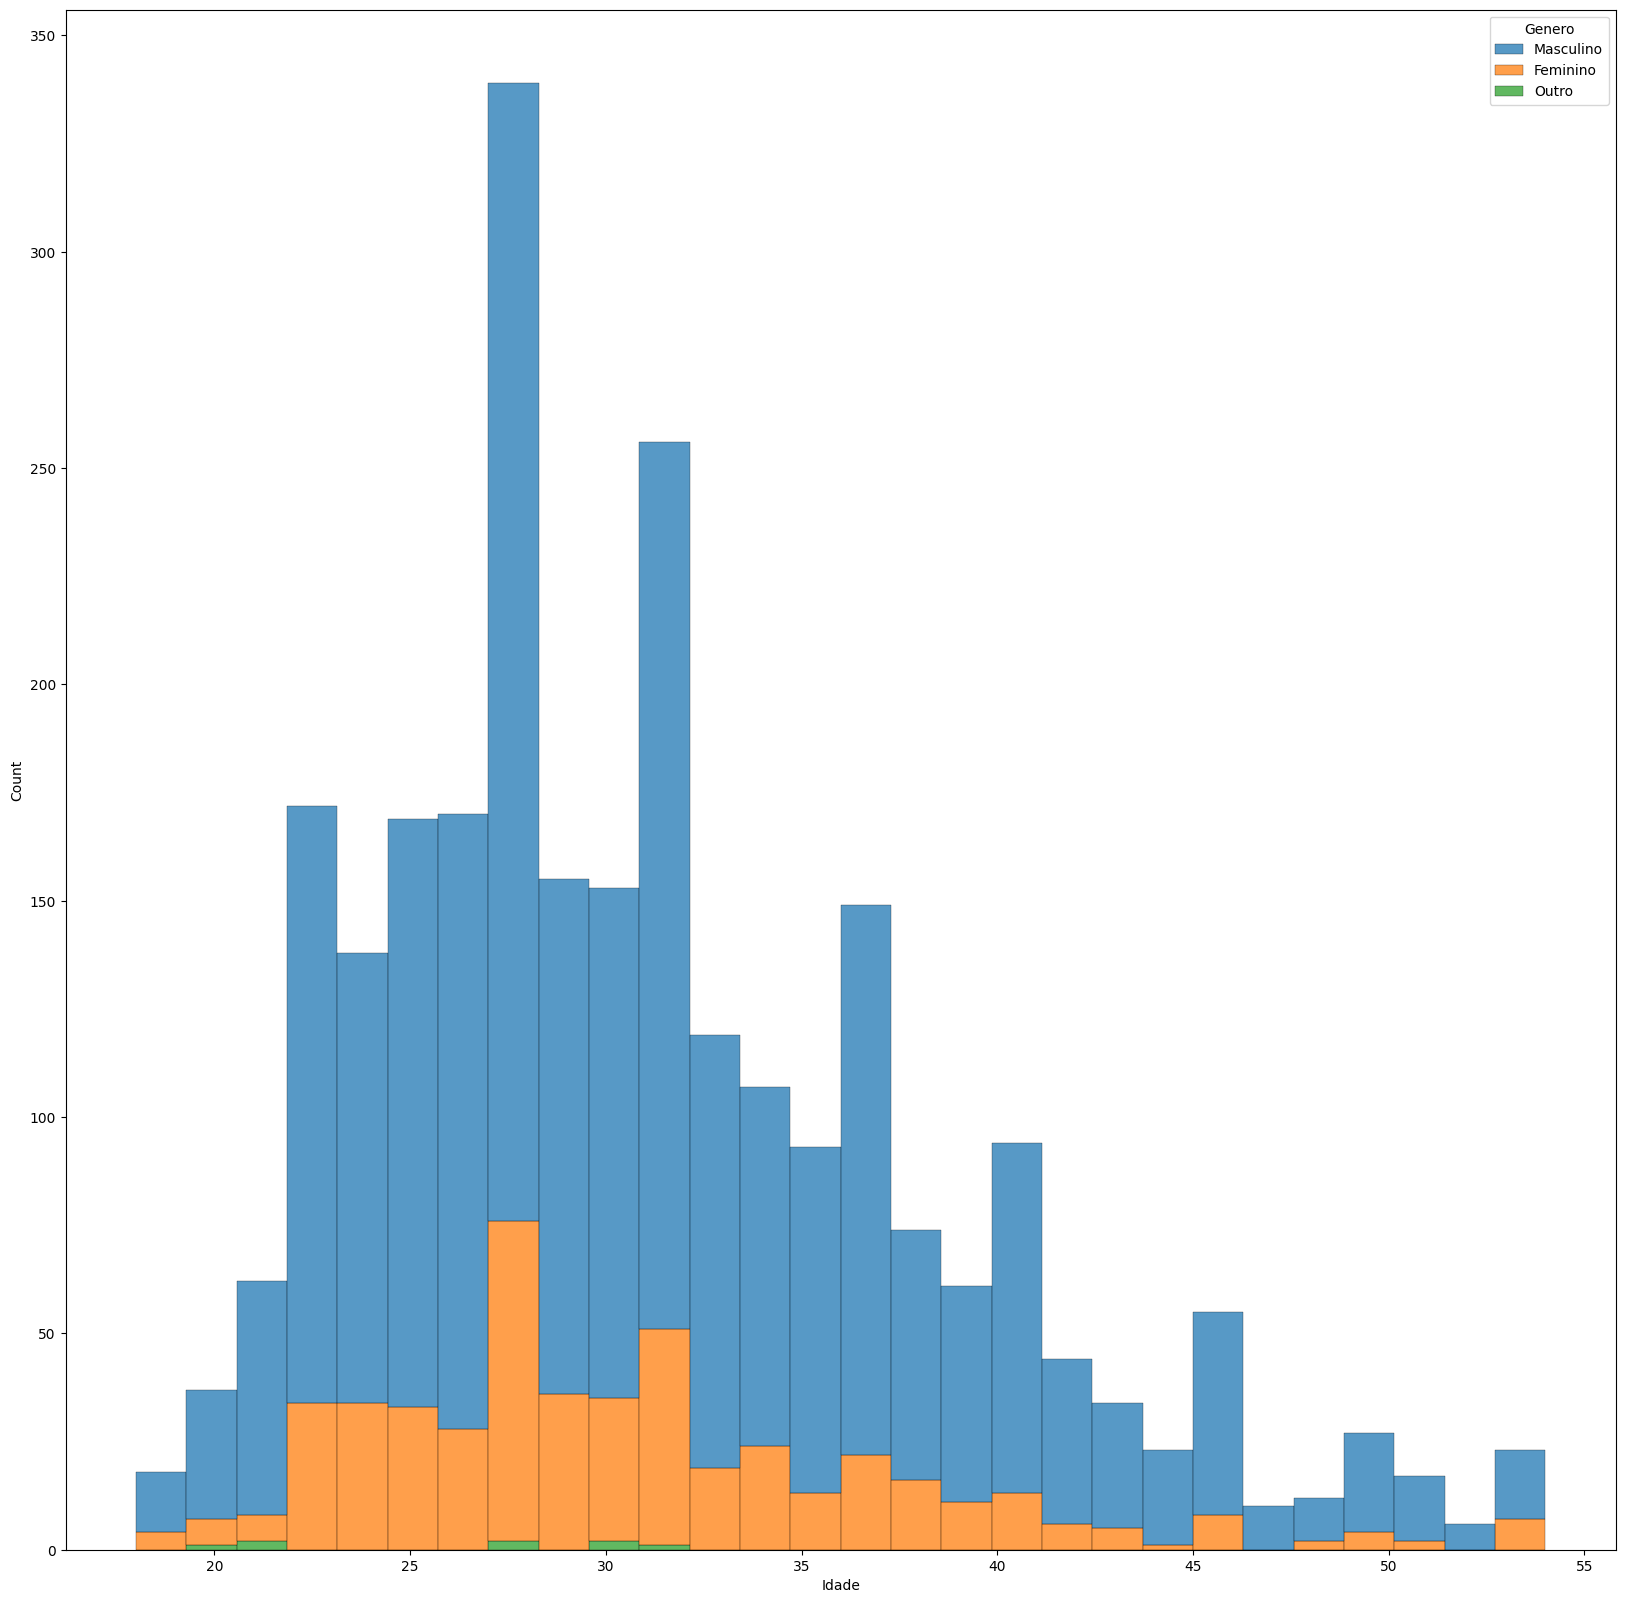

In [31]:
# sns.barplot(df_col_fitro, cmap='viridis', annot=True)
f, ax = plt.subplots(figsize=(20, 20))
sns.histplot(
    df_col_fitro,
    x="Idade", hue="Genero",
    multiple="stack",
    linewidth = 0.2
)

In [32]:
df_col_fitro['Não tenho uma boa relação com meu líder/gestor']

0       NaN
1       NaN
2       0.0
3       0.0
4       0.0
       ... 
2640    NaN
2641    NaN
2642    0.0
2643    NaN
2644    NaN
Name: Não tenho uma boa relação com meu líder/gestor, Length: 2645, dtype: float64

In [33]:
df_col_fitro['Não tenho uma boa relação com meu líder/gestor'].value_counts()

0.0    573
1.0     39
Name: Não tenho uma boa relação com meu líder/gestor, dtype: int64

In [34]:
# Tratando valores nulos em questões de múltipla escolha
# Escolhemos assumir o nulo como 0.0

questao1 = ['Qual o principal motivo da sua insatisfação com a empresa atual?',
 'Falta de oportunidade de crescimento no emprego atual',
 'Salário atual não corresponde ao mercado',
 'Não tenho uma boa relação com meu líder/gestor',
 'Gostaria de trabalhar em em outra área de atuação',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom']
questao2 = ['Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?',
 'Remuneração/Salário',
 'Benefícios',
 'Propósito do trabalho e da empresa',
 'Flexibilidade de trabalho remoto',
 'Ambiente e clima de trabalho',
 'Oportunidade de aprendizado e trabalhar com referências na área',
 'Plano de carreira e oportunidades de crescimento profissional',
 'Maturidade da empresa em termos de tecnologia e dados',
 'Qualidade dos gestores e líderes',
 'Reputação que a empresa tem no mercado']

df_col_fitro[questao1[1:]] = df_col_fitro[questao1[1:]].fillna(0.0)
df_col_fitro[questao2[1:]] = df_col_fitro[questao2[1:]].fillna(0.0)

0.0    573
1.0     39
Name: Não tenho uma boa relação com meu líder/gestor, dtype: int64

In [40]:
df_col_fitro['Não tenho uma boa relação com meu líder/gestor'].value_counts()

0.0    2606
1.0      39
Name: Não tenho uma boa relação com meu líder/gestor, dtype: int64

In [44]:
df_col_fitro['Qualidade dos gestores e líderes'].value_counts()

0.0    2449
1.0     196
Name: Qualidade dos gestores e líderes, dtype: int64